In [1]:
import numpy as np
import qze.dimer_gutz as dimer_gutz
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# No-click dynamics

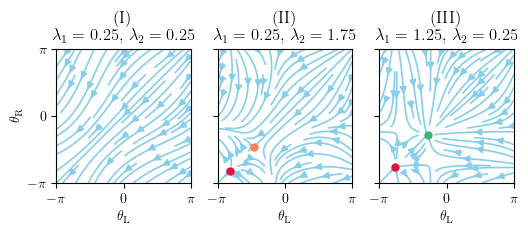

In [2]:
lambdas = [[.25, .25], [.25, 1.75], [1.25, .25]]
Nth = 1001

thetas = np.linspace(-np.pi, np.pi, Nth)

plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_grid_1x3.mplstyle"])

ticks = np.linspace(-np.pi, np.pi, 3)
tick_labels = [r"$-\pi$", r"$0$", r"$\pi$"]

fig, axs = plt.subplots(1, 3)
for i, (lmbd_1, lmbd_2) in enumerate(lambdas):
    flow = dimer_gutz.thetas_flow(thetas, thetas, lmbd_1, lmbd_2)

    
    axs[i].streamplot(thetas, thetas, flow, flow.T,
                      density=.75,
                      color="skyblue")

    axs[i].set_xticks(ticks)
    axs[i].set_xticklabels(tick_labels)
    axs[i].set_yticks(ticks)
    axs[i].set_yticklabels(tick_labels)
    axs[i].set_title(rf'({(i+1) * "I"})'
                     '\n'
                     rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
    axs[i].set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    axs[i].set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
    axs[i].set(aspect='equal')


# Compute and draw stationary pts for phese II
(lmbd_1, lmbd_2) = lambdas[1]

f = dimer_gutz.flow_potential_diag
args = (lmbd_1, lmbd_2)
th_min = minimize_scalar(f,
                         bounds=(-np.pi, np.pi),
                         args=args).x
th_lmax = minimize_scalar(lambda t, lmbd_1, lmbd_2 : -f(t, lmbd_1, lmbd_2),
                          bounds=(-np.pi, th_min),
                          args=args).x
axs[1].plot(th_min, th_min,
            "o",
            markersize=5,
            color="coral")
axs[1].plot(th_lmax, th_lmax,
            "o",
            markersize=5,
            color="crimson")


# Compute and draw stationary pts for phese III
(lmbd_1, lmbd_2) = lambdas[2]

f = dimer_gutz.flow_potential_diag
args = (lmbd_1, lmbd_2)
th_min = minimize_scalar(f,
                         bounds=(-np.pi, np.pi),
                         args=args).x
th_lmax = minimize_scalar(lambda t, lmbd_1, lmbd_2 : -f(t, lmbd_1, lmbd_2),
                          bounds=(-np.pi, th_min),
                          args=args).x
axs[2].plot(th_min, th_min,
            "o",
            markersize=5,
            color="mediumseagreen")
axs[2].plot(th_lmax, th_lmax,
            "o",
            markersize=5,
            color="crimson")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("plots/dimer/dimer-gutz-no-click-flow.pdf")

# Stability of fixed points

In [3]:
epsilon = 10**-4

lmbd_1_list = np.linspace(.75, 1.25, 501)
lmbd_2_list = np.linspace(0, 3, 301)

phase_boundary = np.empty_like(lmbd_2_list)

for i, lmbd_2 in enumerate(lmbd_2_list):
    for j, lmbd_1 in enumerate(lmbd_1_list):
        # Miminize phi_diag
        args = (lmbd_1, lmbd_2)
        t_min= minimize_scalar(dimer_gutz.flow_potential_diag,
                                        bounds=(-np.pi-epsilon, np.pi),
                                        args=args).x
        if t_min > -np.pi:
            H = dimer_gutz.flow_potential_hessian(t_min, t_min, lmbd_1, lmbd_2)
            eigva = np.linalg.eigh(H)[0]
            # print(eigva)
            if all(eigva > 0):
                phase_boundary[i] = lmbd_1
                break

In [4]:
f = open("data/dimer-stages-I-II-analytical.dat", "r")
dat = np.loadtxt(f)
f.close()

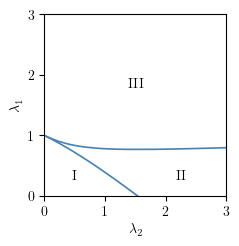

In [5]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")
# plt.contour(lmbd_2_list, lmbd_1_list, phase_diag.T,
#             colors="deepskyblue",
#             linewidths=.85)


plt.plot(lmbd_2_list, phase_boundary,
         color="steelblue")
plt.plot(dat[:,1][1:], dat[:,0][1:],
         color="steelblue")

plt.gca().set_aspect('equal')

plt.text(.5,.33, "I",
         ha="center", va="center")
plt.text(2.25,.33, "II",
         ha="center", va="center")
plt.text(1.5, 1.85, "III",
         ha="center", va="center")

plt.xlim([0, 3])
plt.ylim([0, 3])
plt.yticks([0, 1, 2, 3])

plt.savefig("plots/dimer/dimer-gutz-stages-diagram.pdf", bbox_inches="tight")

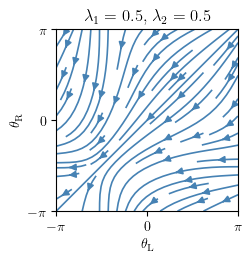

In [6]:
plt.style.use(["./config/stylelib/thesis.mplstyle", "./config/stylelib/manuscript_fullwidth.mplstyle"])

lmbd_1 = .5
lmbd_2 = .5


fig, axs = plt.subplots(1, 1)

flow = dimer_gutz.thetas_flow(thetas, thetas, lmbd_1, lmbd_2)


axs.streamplot(thetas, thetas, flow, flow.T,
                    density=.75,
                    color="steelblue")

axs.set_xticks(ticks)
axs.set_xticklabels(tick_labels)
axs.set_yticks(ticks)
axs.set_yticklabels(tick_labels)
axs.set_title(rf"$\lambda_1 = {lmbd_1}$, $\lambda_2 = {lmbd_2}$")
axs.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
axs.set(xlabel=r"$\theta_\mathrm{L}$", ylabel=r"$\theta_\mathrm{R}$")
axs.set(aspect='equal')

plt.savefig("plots/dimer/dimer-gutz-nc-flow.pdf", bbox_inches="tight")

# Paper

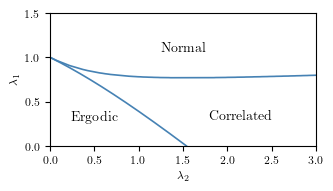

In [7]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])

fig, ax = plt.subplots(layout='tight')


plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")

plt.plot(lmbd_2_list, phase_boundary,
         color="steelblue")
plt.plot(dat[:,1][1:], dat[:,0][1:],
         color="steelblue")

plt.gca().set_aspect('equal')

plt.text(.5,.33, r'Ergodic',
         ha="center", va="center",
         size=10)
plt.text(2.15,.33, r'Correlated',
         ha="center", va="center",
         size=10)
plt.text(1.5, 1.1, r'Normal',
         ha="center", va="center",
         size=10)

plt.xlim([0, 3])
plt.ylim([0, 1.5])
# plt.yticks([0, 1, 2, 3])

fig.set_figheight(2.5)

plt.savefig("plots/dimer/paper/dimer-gutz-stages-diagram.pdf")

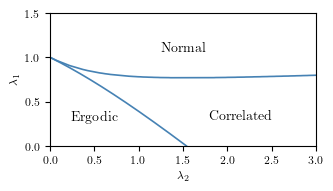

In [8]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])

fig, ax = plt.subplots(layout='tight')


plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")

plt.plot(lmbd_2_list, phase_boundary,
         color="steelblue")
plt.plot(dat[:,1][1:], dat[:,0][1:],
         color="steelblue")

plt.gca().set_aspect('equal')

plt.text(.5,.33, r'Ergodic',
         ha="center", va="center",
         size=10)
plt.text(2.15,.33, r'Correlated',
         ha="center", va="center",
         size=10)
plt.text(1.5, 1.1, r'Normal',
         ha="center", va="center",
         size=10)

plt.xlim([0, 3])
plt.ylim([0, 1.5])
# plt.yticks([0, 1, 2, 3])

# plt.fill_between(lmbd_2_list, phase_boundary,
#                  color='coral',
#                  alpha=.33)

# plt.fill_between(dat[:,1][1:], dat[:,0][1:],
#                  color='mediumseagreen',
#                  alpha=.33)

# plt.fill_between(lmbd_2_list, phase_boundary, 1.5,
#                  color='crimson',
#                  alpha=.33)

fig.set_figheight(2.5)

plt.savefig("plots/dimer/paper/dimer-gutz-stages-diagram.pdf")

In [9]:
ec_boundary_x = dat[:,1][1:][::-1]
ec_boundary_y = dat[:,0][1:][::-1]

ec_boundary_x_interp = lmbd_2_list[:154]
ec_boundary_y_interp = np.interp(ec_boundary_x_interp, ec_boundary_x, ec_boundary_y)

ec_boundary_y_extendeed = np.zeros_like(lmbd_2_list)
ec_boundary_y_extendeed[:len(ec_boundary_y_interp)] = ec_boundary_y_interp

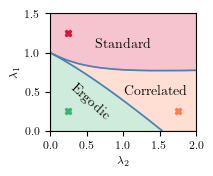

In [58]:
plt.style.use(["./config/stylelib/paper_aps_base.mplstyle",
               "./config/stylelib/paper_aps_single_column.mplstyle"])

fig = plt.figure(figsize=(2, 1.6))

# fig.set_figwidth(2.0)
# fig.set_figheight(2.0)

plt.xlabel(r"$\lambda_2$")
plt.ylabel(r"$\lambda_1$")

plt.plot(lmbd_2_list, phase_boundary,
         color="steelblue")
plt.plot(ec_boundary_x_interp, ec_boundary_y_interp,
         color="steelblue")

plt.xlim([0, 2])
plt.ylim([0, 1.5])
plt.yticks([0, .5, 1, 1.5])

plt.fill_between(lmbd_2_list, ec_boundary_y_extendeed,phase_boundary,
                 color='coral',
                 alpha=.25)

plt.fill_between(ec_boundary_x_interp, ec_boundary_y_interp,
                 color='mediumseagreen',
                 alpha=.25)

plt.fill_between(lmbd_2_list, phase_boundary, 1.5,
                 color='crimson',
                 alpha=.25)

# plt.gca().set_aspect('equal')

plt.text(.55,.375, r'Ergodic',
         ha="center", va="center",
         size=10,
         rotation=-42)
plt.text(1.45, .5, r'Correlated',
         ha="center", va="center",
         size=10)
plt.text(1., 1.1, r'Standard',
         ha="center", va="center",
         size=10)

plt.plot(.25, .25, 'X', color='mediumseagreen')
plt.plot(1.75, .25, 'X', color='coral')
plt.plot(.25, 1.25, 'X', color='crimson')


plt.subplots_adjust(left=.22, bottom=.23, right=.95, top=.965)
# plt.subplots_adjust(left=.22, bottom=.21, right=.95, top=.965)

plt.savefig("plots/dimer/paper/dimer-gutz-stages-diagram-color.pdf")

In [36]:
from matplotlib import colors as mcolors

In [39]:
mcolors.to_rgb(mcolors.CSS4_COLORS['crimson'])

(0.8627450980392157, 0.0784313725490196, 0.23529411764705882)

In [41]:
mcolors.CSS4_COLORS['coral']

'#FF7F50'